# Business Problem

As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted ad campaigns on **Facebook** and **AdWords**, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

# Research Question

**Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?**

This research question aims to compare the performance of Facebook Ads and AdWords Ads across key metrics such as:

- **Conversions**: Which platform drives more desired actions?
- **Clicks**: Which platform generates more user engagement?
- **Cost-effectiveness**: Which platform provides better ROI in terms of cost per click (CPC) and cost per conversion?

By answering this question, we can make data-driven decisions to enhance the effectiveness of our clients' advertising campaigns.


**Importing Libraries**

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import scipy.stats as st
from tabulate import tabulate

# import warnings
# warnings.filterwarnings('ignore')

# Dataset Description

# Ad Campaign Performance Dataset (2019)

This dataset compares the performance of two ad campaigns conducted throughout the year 2019: a **Facebook Ad campaign** and an **AdWords Ad campaign**. The dataset includes daily data for the entire year, totaling 365 rows. Each row provides various performance metrics for the campaigns.

## Key Features

- **Date**: The specific date for the data, ranging from January 1st, 2019, to December 31st, 2019.
- **Ad Views**: The number of times the ad was viewed.
- **Ad Clicks**: The number of clicks the ad received.
- **Ad Conversions**: The number of conversions resulting from the ad.
- **Cost per Ad**: The cost associated with running the Facebook ad campaign.
- **Click-Through Rate (CTR)**: The ratio of clicks to views, indicating the ad's effectiveness in generating clicks.
- **Conversion Rate**: The ratio of conversions to clicks, showing how well the ad drives desired actions.
- **Cost per Click (CPC)**: The average cost per click on the ad.

## Dataset Overview

- **Total Rows**: 365 (one for each day of the year)
- **Campaigns Compared**: Facebook Ads vs. AdWords Ads

This dataset allows for a detailed analysis of the effectiveness and efficiency of both campaigns over the course of the year.

In [142]:
df = pd.read_csv("marketing_campaign.csv")
df.head(3)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23


In [143]:
print(df.shape)
print(df.dtypes)

(365, 17)
Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtyp

In [144]:
# Converting DATE into date-time
df['Date'] = pd.to_datetime(df['Date'])
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


We cannot remove outliers here. Since we have whole 365 days of data and outliers have meaning. 

Maybe somedays ads went viral ? How often do ads go viral and on which platform it happens. Therefore outliers have meaning of its own.

We will use scaling, standardisation and normalization instead of removing outliers

# Comparing Campaigns Performance

# 1. First we'll chech for clicks and conversions for facebook and adwords

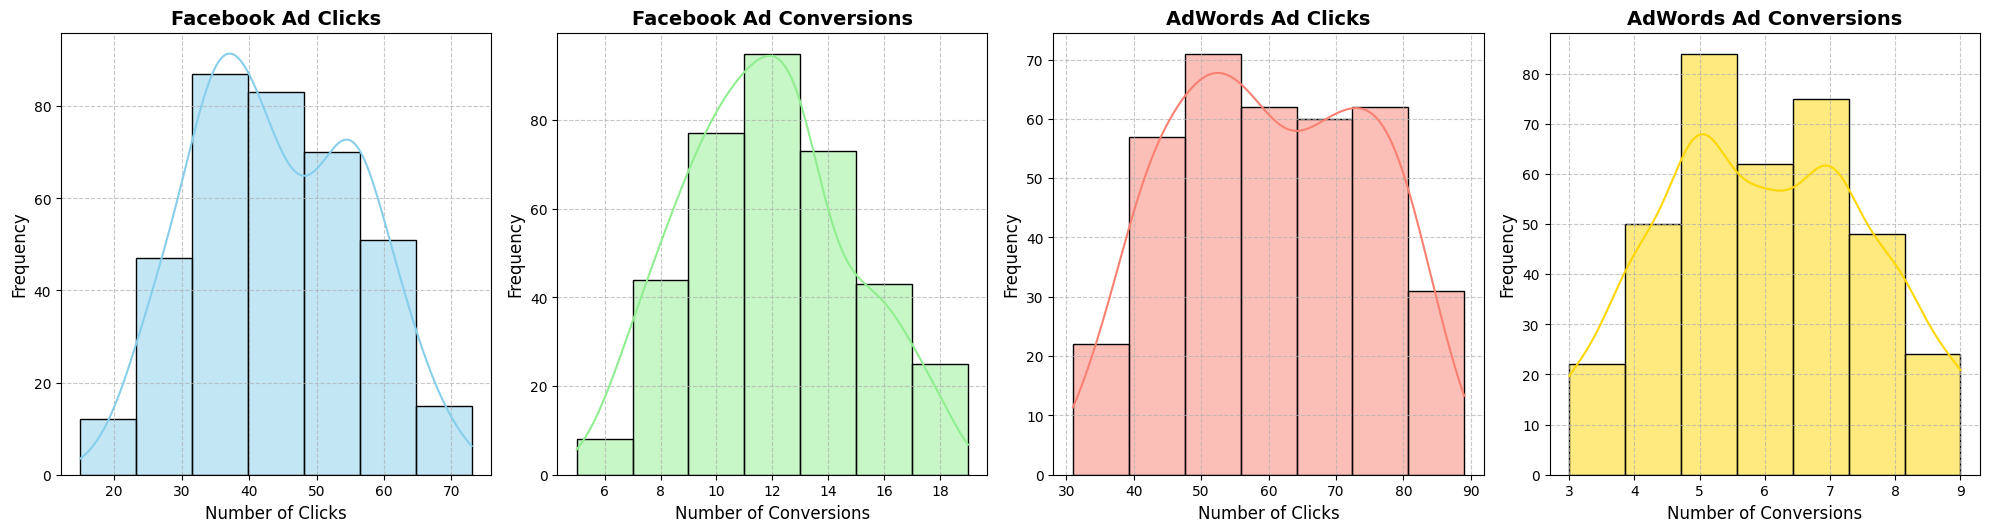

In [145]:
plt.figure(figsize=(20, 10))

# Facebook Ad Clicks
plt.subplot(2, 4, 1)
plt.title("Facebook Ad Clicks", fontsize=14, fontweight='bold')
sns.histplot(df['Facebook Ad Clicks'], bins=7, edgecolor="k", kde=True, color='skyblue')
plt.xlabel('Number of Clicks', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Facebook Ad Conversions
plt.subplot(2, 4, 2)
plt.title("Facebook Ad Conversions", fontsize=14, fontweight='bold')
sns.histplot(df['Facebook Ad Conversions'], bins=7, edgecolor="k", kde=True, color='lightgreen')
plt.xlabel('Number of Conversions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# AdWords Ad Clicks
plt.subplot(2, 4, 3)
plt.title("AdWords Ad Clicks", fontsize=14, fontweight='bold')
sns.histplot(df['AdWords Ad Clicks'], bins=7, edgecolor="k", kde=True, color='salmon')
plt.xlabel('Number of Clicks', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# AdWords Ad Conversions
plt.subplot(2, 4, 4)
plt.title("AdWords Ad Conversions", fontsize=14, fontweight='bold')
sns.histplot(df['AdWords Ad Conversions'], bins=7, edgecolor="k", kde=True, color='gold')
plt.xlabel('Number of Conversions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# How frequently do we observe days with high number of conversions compare to low number of conversions ?

In [146]:
# creating a function to calculate category for the conversion
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif conversion < 11:
            category.append('6 - 10')
        elif conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

# applying function of conversion category to know which days have high or low conversions

df['Facebook Conversions Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversions Category'] = create_conversion_category('AdWords Ad Conversions')
df.head(3)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversions Category,AdWords Conversions Category
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2019-01-02,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10
2,2019-01-03,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6 - 10,less than 6


In [147]:
print(df['Facebook Conversions Category'].value_counts())
print(df['AdWords Conversions Category'].value_counts())

Facebook Conversions Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64
AdWords Conversions Category
6 - 10         209
less than 6    156
Name: count, dtype: int64


In [148]:
facebook = pd.DataFrame(df['Facebook Conversions Category'].value_counts()).reset_index().rename(columns = 
{'Facebook Conversions Category' : 'Category'})
adwords = pd.DataFrame(df['AdWords Conversions Category'].value_counts()).reset_index().rename(columns = 
{'AdWords Conversions Category' : 'Category'})
print(facebook)
print(adwords)

       Category  count
0       10 - 15    189
1        6 - 10    128
2  more than 15     47
3   less than 6      1
      Category  count
0       6 - 10    209
1  less than 6    156


In [149]:
category_df = pd.merge(facebook, adwords, on = 'Category', how = 'outer').fillna(0)
print(category_df)

# count_x = facebook -> first one. 

       Category  count_x  count_y
0       10 - 15      189      0.0
1        6 - 10      128    209.0
2   less than 6        1    156.0
3  more than 15       47      0.0


In [150]:
category_df = category_df.iloc[[3, 1, 0, 2]]
category_df

,Category,count_x,count_y
3,more than 15,47,0.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,less than 6,1,156.0


In [151]:
X_axis = np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

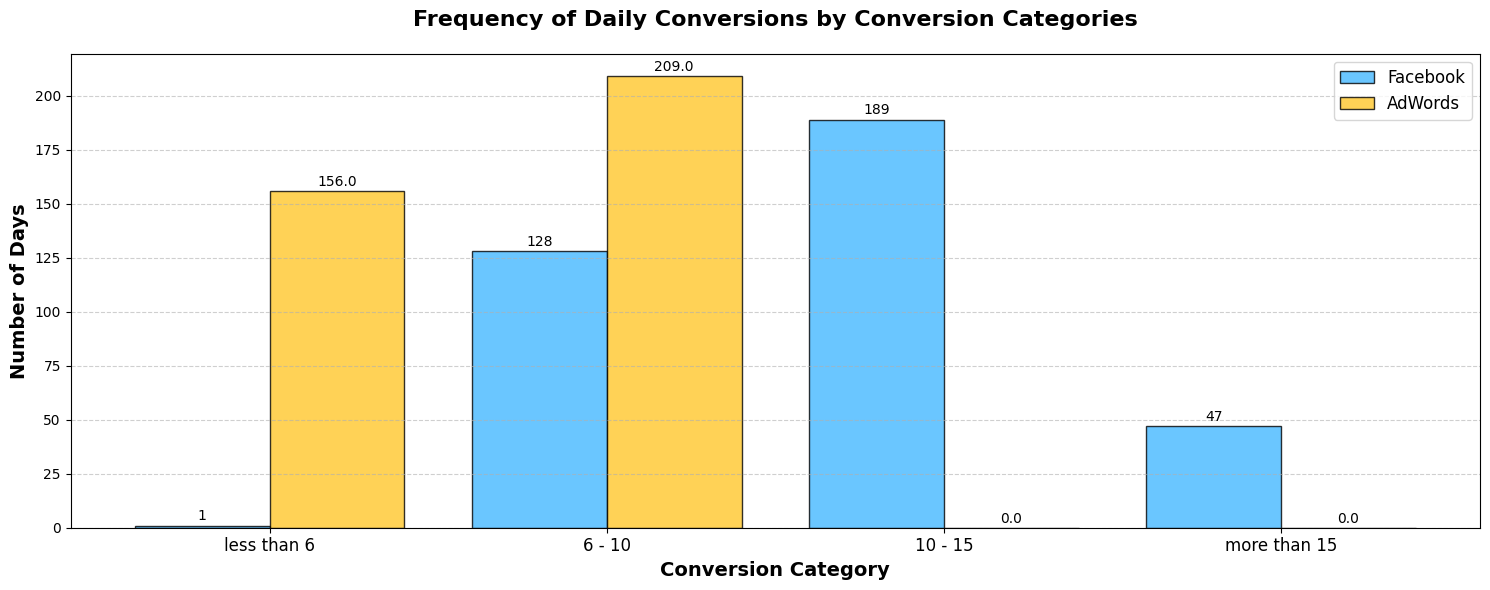

In [152]:
# Define the correct order for the categories
category_order = ['less than 6', '6 - 10', '10 - 15', 'more than 15']

# Convert the 'Category' column to a categorical type with the defined order
category_df['Category'] = pd.Categorical(category_df['Category'], categories=category_order, ordered=True)

# Sort the DataFrame by the 'Category' column
category_df = category_df.sort_values('Category')

# Define the X-axis and figure size
X_axis = np.arange(len(category_df))
plt.figure(figsize=(15, 6))

# New color scheme
facebook_color = '#45B8FF'  # A shade of blue
adwords_color = '#FFC72C'   # A shade of orange

# Plot Facebook bars
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label='Facebook', color=facebook_color, linewidth=1, edgecolor='k', alpha=0.8)

# Plot AdWords bars
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label='AdWords', color=adwords_color, linewidth=1, edgecolor='k', alpha=0.8)

# Customize X-axis labels
plt.xticks(X_axis, category_df['Category'], fontsize=12)
plt.xlabel("Conversion Category", fontsize=14, fontweight='bold')

# Customize Y-axis labels
plt.ylabel("Number of Days", fontsize=14, fontweight='bold')

# Add a title
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize=16, fontweight='bold', pad=20)

# Add a legend
plt.legend(fontsize=12, loc='upper right')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6, axis='y')

# Add annotations for each bar (optional)
for i, (fb, ad) in enumerate(zip(category_df['count_x'], category_df['count_y'])):
    plt.text(X_axis[i] - 0.2, fb + 1, str(fb), ha='center', va='bottom', fontsize=10, color='black')
    plt.text(X_axis[i] + 0.2, ad + 1, str(ad), ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Analysis of Ad Campaign Performance

## Key Observations

1. **Facebook Performance**:
   - Facebook had more frequent higher conversion days compared to AdWords.
   - The platform showed a consistent presence across all conversion categories, including higher ranges (10 - 15 and more than 15).

2. **AdWords Performance**:
   - AdWords either had very low conversion rates (less than 6) or moderate ones (6 - 10).
   - There were no days with conversions in the higher ranges (10 - 15 or more than 15), indicating a potential issue with campaign effectiveness.

3. **Variance Between Campaigns**:
   - There is a significant variance in the number of high-conversion days between Facebook and AdWords campaigns.
   - This suggests that Facebook's strategies or targeting may have been more effective in driving conversions.

## Recommendations

- **Review AdWords Strategies**:
  - Investigate why AdWords did not achieve any high-conversion days (10 - 15 or more than 15).
  - Analyze what strategies were used and identify any changes or external factors that could have influenced these results.

- **Optimize Campaigns**:
  - Consider reallocating resources towards Facebook if it continues to show better performance.
  - Test new strategies on AdWords to improve conversion rates, such as refining targeting, ad creatives, or bidding strategies.

- **External Factors**:
  - Evaluate external factors (e.g., market trends, competition, or seasonal influences) that may have impacted AdWords performance.

## Conclusion

The data indicates that Facebook outperformed AdWords in terms of higher conversion days. AdWords showed limited success, primarily in lower conversion ranges. A thorough review of AdWords strategies and external factors is recommended to improve its performance and achieve more balanced results across both platforms.

# Do more clicks on the ad really lead to more sales ? 

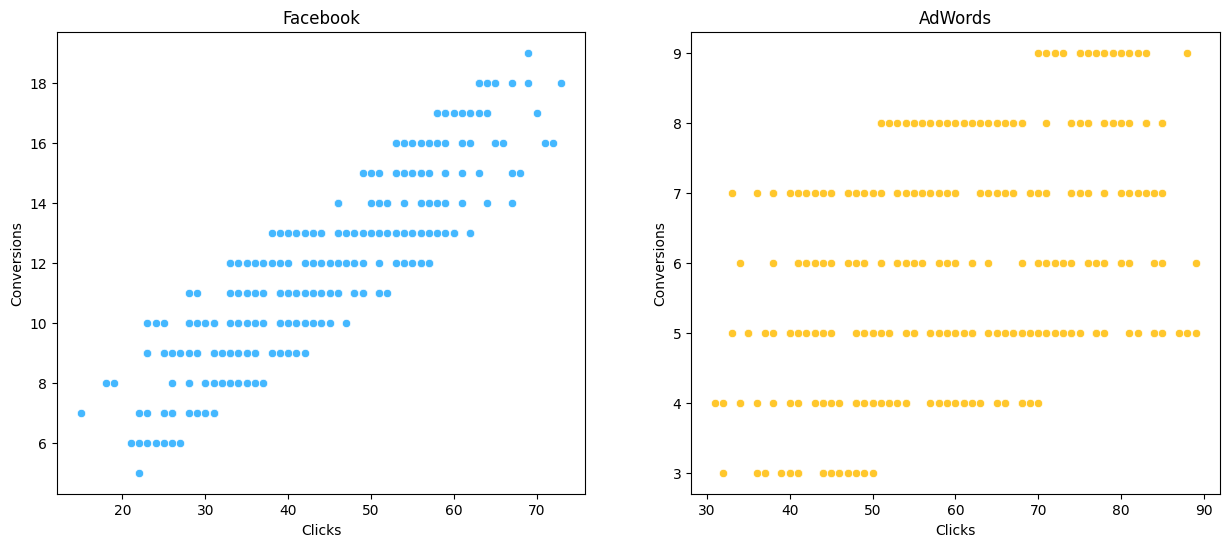

In [153]:
plt.figure(figsize=(15,6))

# Facebook Scatter Plot (Sky Blue)
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#45B8FF')  # Sky Blue
plt.xlabel('Clicks')
plt.ylabel('Conversions')

# AdWords Scatter Plot (Gold)
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x=df['AdWords Ad Clicks'], y=df['AdWords Ad Conversions'], color='#FFC72C')  # Gold
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.show()

We are doing Pearson Correlation instead of Covariance, because we want not just relation, but magnitude. How strongly does ad clicks convert into sales compared to each other (and not do they get converted or not)

In [154]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
print(adwords_corr,facebook_corr)

                        AdWords Ad Conversions  AdWords Ad Clicks
AdWords Ad Conversions                1.000000           0.447993
AdWords Ad Clicks                     0.447993           1.000000                          Facebook Ad Conversions  Facebook Ad Clicks
Facebook Ad Conversions                 1.000000            0.873775
Facebook Ad Clicks                      0.873775            1.000000


In [155]:
print('Correlation Coeff \n--------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Correlation Coeff 
--------------
Facebook : 0.87
AdWords :  0.45


## Analysis of Correlation Between Ad Clicks and Sales  

### Facebook Ads  
- A **correlation coefficient of 0.87** indicates a **strong positive linear relationship** between clicks on Facebook ads and sales.  
- This suggests that as the number of clicks on Facebook ads **increases, sales also tend to increase** significantly.  
- The strong correlation implies that Facebook ads are **highly effective in driving sales**, as a large portion of sales variation can be explained by ad clicks.  
- **Recommendation:** Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.  

### AdWords Ads  
- A **correlation coefficient of 0.45** indicates a **moderate positive linear relationship** between clicks on AdWords ads and sales.  
- While there is still a **positive relationship**, it is **not as strong** as with Facebook ads.  
- This suggests that **AdWords advertising contributes to sales**, but its effectiveness may be influenced by other factors.  
- **Recommendation:** Further analysis is needed to identify these influencing factors and optimize AdWords campaigns accordingly.  


## Hypothesis Testing  

### Hypothesis  
**Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.**  

### Null Hypothesis (H₀)  
There is **no difference** in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is **greater than or equal** to those from Facebook.  

\[
H_0: \mu_{\text{Facebook}} \leq \mu_{\text{AdWords}}
\]

### Alternate Hypothesis (H₁)  
The number of conversions from **Facebook is greater** than the number of conversions from AdWords.  

\[
H_1: \mu_{\text{Facebook}} > \mu_{\text{AdWords}}
\]


In [156]:
print('Mean Conversion \n--------------')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic', t_stats, '\np-value',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Mean Conversion 
--------------
Facebook : 11.74
AdWords : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


## Results and Analysis  

### Comparison of Mean Conversions  
- The **mean number of conversions** from Facebook ads (**11.74**) is **substantially higher** than the mean number of conversions from AdWords ads (**5.98**).  
- This suggests that, on average, **Facebook advertising is more effective** in generating conversions compared to AdWords advertising.  

### T-Statistic  
- The **T statistic (32.88)** measures the difference between the means of the two groups relative to the variation within the groups.  
- A **larger T statistic** indicates a greater difference between the means of the two groups.  

### P-Value  
- The **p-value (9.35e-134)** is **extremely small**, indicating **strong evidence against the null hypothesis**.  

### Conclusion  
- The results **strongly support the alternate hypothesis**, confirming that the **number of conversions from Facebook ads is greater** than those from AdWords ads.  
- Based on the sample data analyzed, **Facebook advertising appears to be a more effective channel** for generating conversions compared to AdWords.  

### Recommendations  
- Given the **significant difference in conversion rates** between Facebook and AdWords:  
  - **Reallocate resources** towards Facebook advertising efforts.  
  - **Increase ad spend** on Facebook to maximize conversions.  
  - **Expand targeting strategies** to reach a broader audience.  
  - **Experiment with different ad formats** to capitalize on Facebook's effectiveness in driving conversions.  


## Regression Analysis  

**What will happen when I invest in Facebook Ads?**  

**How many Facebook ad conversions can I expect given a certain number of Facebook ad clicks?**  

## Regression Analysis  

### Predicting Facebook Ad Conversions  
A key question in advertising analysis is:  

**What will happen when I invest in Facebook Ads? How many Facebook ad conversions can I expect given a certain number of Facebook ad clicks?**  

### Regression Model  
To estimate the number of conversions based on Facebook ad clicks, we can use a **linear regression model** 


### Interpretation  
- A **positive**  value suggests that **more clicks lead to more conversions**.  
- The **strength of the relationship** is measured by the **R² value**, indicating how well clicks predict conversions.  

### Practical Use  
- Advertisers can use this model to forecast **expected conversions** at different ad spend levels.  

### Next Steps  
- **Run a regression analysis** using Facebook ad data to determine relationship with clicks and conversions.  
- **Evaluate the model's accuracy** using metrics like R² and p-values.  
- **Use the model to make data-driven ad budget decisions.**  


In [157]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


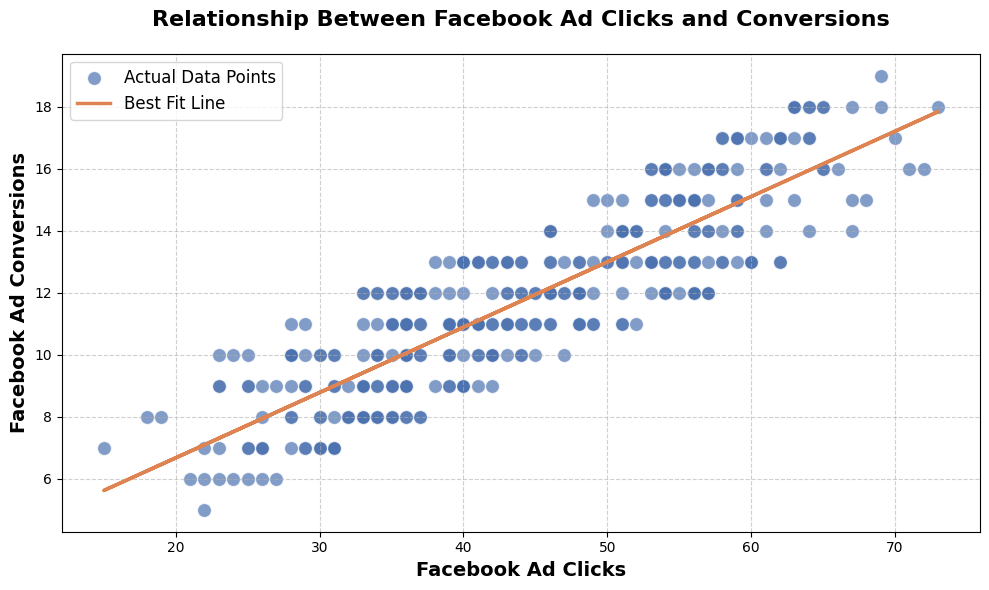

In [158]:
plt.figure(figsize=(10, 6))  # Slightly larger figure size for better readability

# Scatterplot for actual data points
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#4C72B0', label='Actual Data Points', s=100, alpha=0.7)

# Plot the best fit line
plt.plot(df['Facebook Ad Clicks'], prediction, color='#DD8452', linewidth=2.5, label='Best Fit Line')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Customize axis labels
plt.xlabel("Facebook Ad Clicks", fontsize=14, fontweight='bold')
plt.ylabel("Facebook Ad Conversions", fontsize=14, fontweight='bold')

# Add a title
plt.title("Relationship Between Facebook Ad Clicks and Conversions", fontsize=16, fontweight='bold', pad=20)

# Customize the legend
plt.legend(fontsize=12, loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [160]:
# Create a list of predictions
predictions = [
    [50, round(reg_model.predict([[50]])[0][0], 2)],
    [80, round(reg_model.predict([[80]])[0][0], 2)]
]

# Display the predictions in a table
headers = ["Clicks", "Expected Conversions"]
print(tabulate(predictions, headers=headers, tablefmt="pretty"))

+--------+----------------------+
| Clicks | Expected Conversions |
+--------+----------------------+
|   50   |         13.0         |
|   80   |        19.31         |
+--------+----------------------+


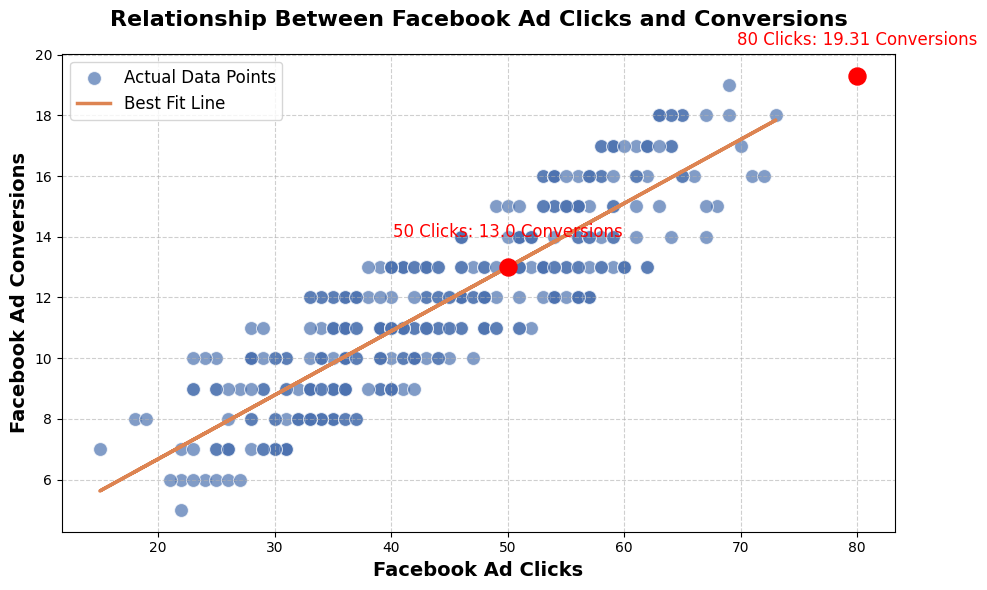

In [161]:
plt.figure(figsize=(10, 6))

# Scatterplot for actual data points
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#4C72B0', label='Actual Data Points', s=100, alpha=0.7)

# Plot the best fit line
plt.plot(df['Facebook Ad Clicks'], prediction, color='#DD8452', linewidth=2.5, label='Best Fit Line')

# Add predictions as annotations
clicks_to_predict = [50, 80]
for click in clicks_to_predict:
    conversion = round(reg_model.predict([[click]])[0][0], 2)
    plt.scatter(click, conversion, color='red', s=150, zorder=5)  # Highlight prediction points
    plt.text(click, conversion + 1, f'{click} Clicks: {conversion} Conversions', fontsize=12, ha='center', color='red')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Customize axis labels
plt.xlabel("Facebook Ad Clicks", fontsize=14, fontweight='bold')
plt.ylabel("Facebook Ad Conversions", fontsize=14, fontweight='bold')

# Add a title
plt.title("Relationship Between Facebook Ad Clicks and Conversions", fontsize=16, fontweight='bold', pad=20)

# Customize the legend
plt.legend(fontsize=12, loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Model Performance and Business Insights  

### Predictive Power of the Model  
- The model has a **reasonably good predictive power**, with an **R² score of 76.35%**.  
- This suggests that the model can **effectively predict Facebook ad conversions** based on the number of Facebook ad clicks.  

### Business Applications  
With the insights provided by the **Linear Regression model**, businesses can make **informed decisions** regarding:  
- **Resource Allocation** – Distributing budget efficiently between different ad platforms.  
- **Budget Planning** – Setting appropriate ad budgets based on expected conversions.  
- **Campaign Optimization** – Refining ad strategies to maximize return on investment (ROI).  

### Practical Example  
- Knowing the **expected number of Facebook ad conversions** based on a given number of Facebook ad clicks helps in:  
  - **Setting realistic campaign goals**  
  - **Optimizing ad spend** to improve performance  
  - **Assessing the ROI** of Facebook advertising efforts  

By leveraging this model, businesses can enhance their **marketing strategies** and achieve **better conversion rates** from their ad campaigns.  


## 📊 How have Facebook campaign metrics changed over time?  

In [162]:
# cleaning data ( removing unwanted symbols from the columns and converting them to numerical columns)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))

In [163]:
# filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


## At what times of the month or days of the week do we observe the conversions?

In [164]:
# extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

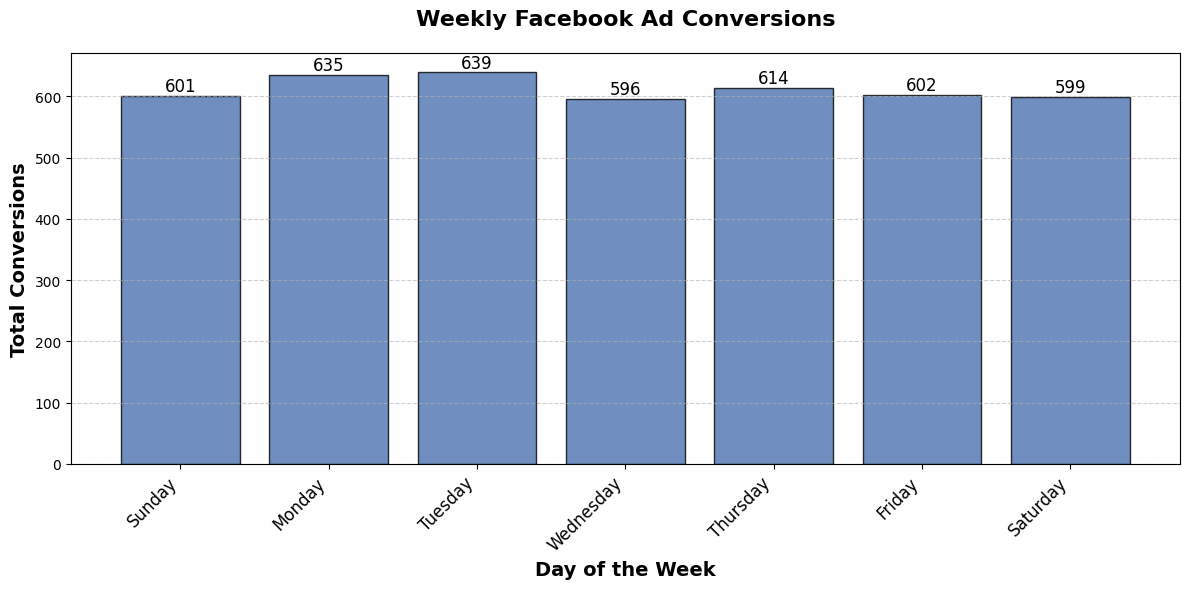

In [166]:
plt.figure(figsize=(12, 6))  # Increase figure width to provide more space for X-axis labels

# Calculate weekly conversions
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the bar chart
bars = plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color='#4C72B0', edgecolor='k', alpha=0.8)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6, axis='y')

# Customize axis labels
plt.xlabel("Day of the Week", fontsize=14, fontweight='bold')
plt.ylabel("Total Conversions", fontsize=14, fontweight='bold')

# Add a title
plt.title("Weekly Facebook Ad Conversions", fontsize=16, fontweight='bold', pad=20)

# Add annotations for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=12, color='black')

# Rotate X-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate labels and align them to the right

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

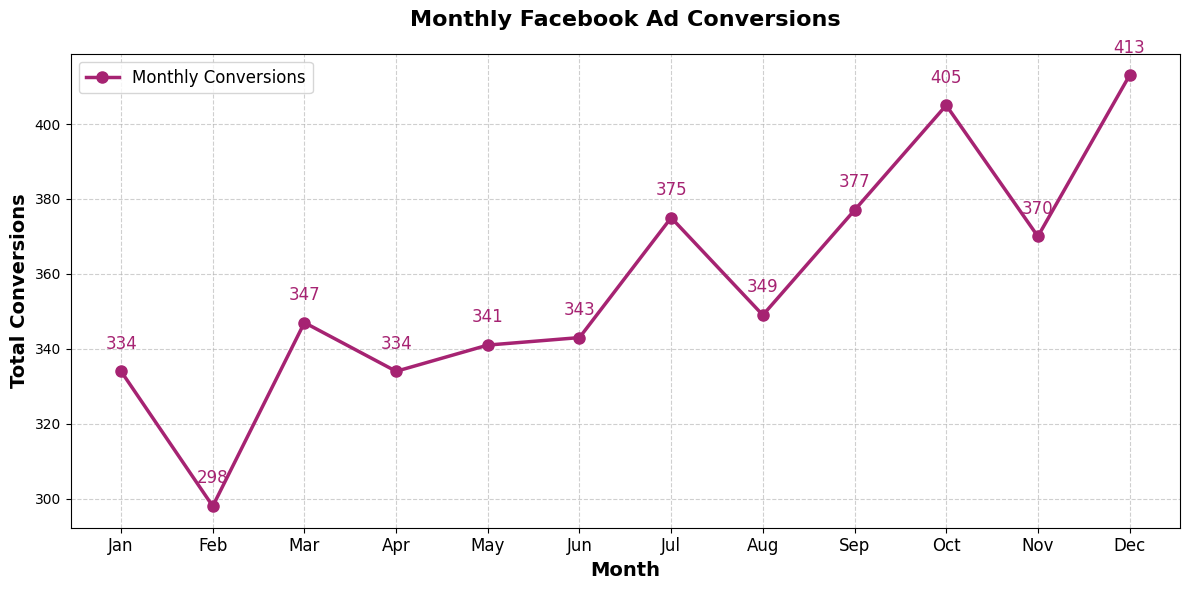

In [167]:
plt.figure(figsize=(12, 6))  # Slightly larger figure size for better readability

# Calculate monthly conversions
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the line chart
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'], '-o', color='#A62372', linewidth=2.5, markersize=8, label='Monthly Conversions')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Customize axis labels
plt.xlabel("Month", fontsize=14, fontweight='bold')
plt.ylabel("Total Conversions", fontsize=14, fontweight='bold')

# Add a title
plt.title("Monthly Facebook Ad Conversions", fontsize=16, fontweight='bold', pad=20)

# Add annotations for each data point
for i, conversion in enumerate(monthly_conversion['Facebook Ad Conversions']):
    plt.text(i, conversion + 5, f'{int(conversion)}', ha='center', va='bottom', fontsize=12, color='#A62372')

# Customize X-axis labels
plt.xticks(fontsize=12)

# Add a legend
plt.legend(fontsize=12, loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## 📅 Weekly and Monthly Conversion Trends  

### **Weekly Trends**  
- Across the weekdays over a year, the **total number of conversions remains relatively consistent**, indicating **steady user engagement** throughout the week.  
- **Mondays and Tuesdays exhibit the highest conversion rates**, suggesting that the **beginning of the workweek sees heightened engagement** and responsiveness to marketing efforts.  

### **Monthly Trends**  
- The overall **monthly trend in conversions shows an upward trajectory**, indicating a general increase in conversions over time.  
- However, certain months—**February, April, May, June, August, and November**—experience a **decline in conversions** compared to neighboring months.  
- These fluctuations may be influenced by **seasonal trends, changes in consumer behavior, or adjustments in marketing strategies**.  

## 📉 How does the Cost Per Conversion (CPC) trend over time?  

### **Cost Per Conversion (CPC)**  
- **Definition:** CPC is a key metric used to **evaluate the cost-effectiveness and profitability** of an online advertising campaign.  
- It helps marketers determine **how much they are spending per conversion**, allowing them to **optimize spending and improve targeting strategies**.  
- **Understanding CPC trends over time** can provide insights into **budget efficiency and advertising effectiveness**.  


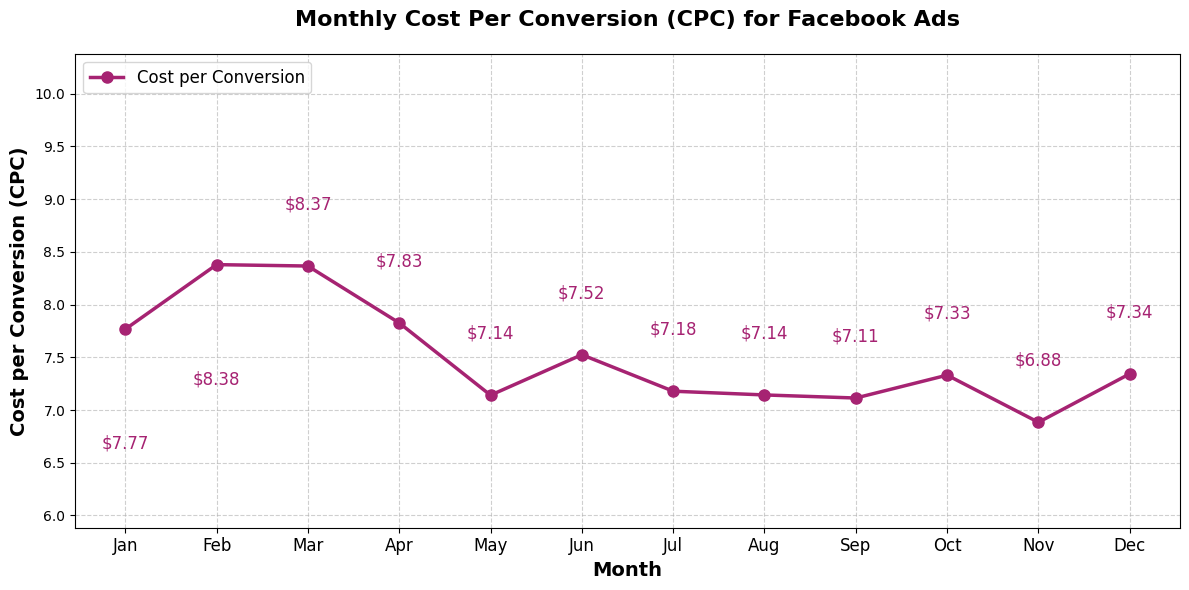

In [ ]:
plt.figure(figsize=(12, 6))  # Slightly larger figure size for better readability

# Calculate monthly cost per conversion
monthly_df = df.groupby('month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad'] / monthly_df['Facebook Ad Conversions']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the line chart
plt.plot(month_names, monthly_df['Cost per Conversion'], '-o', color='#A62372', linewidth=2.5, markersize=8, label='Cost per Conversion')

# Expand y-axis limits slightly to prevent label cutoff
plt.ylim(min(monthly_df['Cost per Conversion']) - 1, max(monthly_df['Cost per Conversion']) + 2)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Customize axis labels
plt.xlabel("Month", fontsize=14, fontweight='bold')
plt.ylabel("Cost per Conversion (CPC)", fontsize=14, fontweight='bold')

# Add a title
plt.title("Monthly Cost Per Conversion (CPC) for Facebook Ads", fontsize=16, fontweight='bold', pad=20)

# Add annotations for each data point (adjust label placement)
for i, cpc in enumerate(monthly_df['Cost per Conversion']):
    y_offset = 0.5 if i > 1 else -1  # Move first two labels slightly below
    plt.text(i, cpc + y_offset, f'${cpc:.2f}', ha='center', va='bottom' if i > 1 else 'top', 
             fontsize=12, color='#A62372')

# Customize X-axis labels
plt.xticks(fontsize=12)

# Add a legend
plt.legend(fontsize=12, loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


## 📊 Cost Per Conversion (CPC) Trends Over Time  

- The **CPC trend over the 12-month period** shows **some fluctuations** but remains **relatively stable** overall.  
- **May and November have the lowest CPC values**, indicating:  
  - **More cost-effective advertising**  
  - **Higher conversion rates during these periods**  
- **February has the highest CPC value**, suggesting:  
  - **Higher advertising costs compared to other months**  
  - **Potential seasonal demand or competition affecting pricing**  
- **Lower CPC values in certain months (e.g., May & November) could indicate:**  
  - **Higher advertising effectiveness**  
  - **More favorable market conditions**  
- **Strategic Recommendation:**  
  - Consider **allocating more budget** to months with **historically lower CPC values** (e.g., May & November).  
  - This could **maximize ROI by leveraging cost-efficient advertising periods**.  

## 🔄 Is There a Long-Term Equilibrium Between Ad Spend & Conversion Rates?  
- Does this relationship suggest a **stable, proportional impact** of budget changes on conversions over time?  
- Can businesses **predict conversion growth** based on **consistent ad spend adjustments**?  


In [170]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103219
P-value: 2.1337375979061323e-26

p-value is less than significance value, Reject the null hypothesis


## 📈 Statistical Conclusion: Relationship Between Ad Spend & Conversions  

- Since the **p-value is significantly lower** than the chosen significance level, we **reject the null hypothesis**.  
- This indicates a **long-term equilibrium relationship** between **advertising spend (cost) and conversions**.  

## 🔍 Business Implications  

- Businesses can **leverage this stable relationship** to **optimize advertising strategies**.  
- By investing in campaigns with a **strong return on investment (ROI)**, companies can:  
  - **Maximize conversions** while **minimizing costs**.  
  - **Adjust ad spend** based on performance insights to improve efficiency.  
- **Strategic takeaway:** A data-driven approach to **budget allocation** can enhance **conversion rates** while ensuring cost-effectiveness.  
